In [48]:
# Importing necessary modules for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#pd.set_option('display.max_columns',400)

In [49]:
# Load Train and Test data set
data_train = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")

In [50]:
# Describing the data to see different statistical parameters
data_train.describe(include='all')

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209,4209,4209,4209,4209,4209,4209,4209,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
unique,NaN,NaN,47,27,44,7,4,29,12,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,z,aa,as,c,d,v,g,j,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,360,833,1659,1942,4205,231,1042,277,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4205.960798,100.669318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [51]:
# Droping duplicate rows from train data set
data_train.drop_duplicates(subset = data_train.drop(['ID'],axis=1).columns,inplace=True)

In [52]:
# Checking if any column in train data has got null values
print(data_train.isna().sum()[data_train.isna().sum() > 0])
print(data_test.isna().sum()[data_test.isna().sum() > 0])

Series([], dtype: int64)
Series([], dtype: int64)


In [53]:
# No of unique values in each column in train data
pd.DataFrame(data_train.nunique()).transpose()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,4208,2545,47,27,44,7,4,29,12,25,...,2,2,2,2,2,2,2,2,2,2


In [54]:
# Getting index having zero variance in train set
data_train_zero_var = data_train.std()[data_train.std() == 0].index
print(data_train_zero_var)

Index(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293',
       'X297', 'X330', 'X347'],
      dtype='object')


In [55]:
# Drop the columns with zero variance in train and test data sets
data_train.drop(data_train_zero_var,axis=1,inplace=True)
data_train.drop(['ID'],axis=1,inplace=True)

data_test.drop(data_train_zero_var,axis=1,inplace=True)
data_test.drop(['ID'],axis=1,inplace=True)

In [56]:
# Splitting train data into dependent and independent variables
data_train_X = data_train[data_train.columns.drop('y')]
data_train_y = data_train['y']

# Applying Label Encoder

In [59]:
# Import module to perform Label Encoding
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Concatenating test and train data set do perform Label Encoding.
concat_train_test = pd.concat([data_train_X,data_test],ignore_index=True)

In [60]:
# Encode categorical data to numerical
encoder = LabelEncoder()
concat_train_test = concat_train_test.apply(encoder.fit_transform)

In [62]:
# Splitting test and train data set
data_train_X = concat_train_test[0:data_train_y.shape[0]]
data_test_X = concat_train_test[data_train_y.shape[0]:]

# Scaling and Dimensionality Reduction on Train data set

In [63]:
# Import module to scale the data in the same range to perform PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [64]:
# Scaling the train data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_train_X)

In [66]:
# Perform dimensionality recudtion on train data. 
# It will choose no of components for which it achieves 70% variability
pca = PCA(0.7)
X_pca = pca.fit_transform(scaled_data)
pca.explained_variance_ratio_

array([0.12978678, 0.08757254, 0.08519355, 0.06744382, 0.05641114,
       0.04697422, 0.03764255, 0.03240446, 0.02777835, 0.02473192,
       0.02307844, 0.0194863 , 0.01692304, 0.0162795 , 0.01522939,
       0.0146443 ])

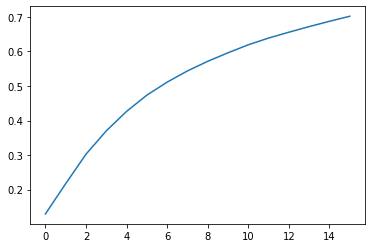

In [67]:
# Plotting Explained variance against no of components.
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

# Model Building

In [68]:
# Import XGB regressor to build the model
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

In [69]:
# Splitting train data set into : Train and test
X_train,X_test,y_train,y_test = train_test_split(X_pca,data_train_y,test_size=0.3,random_state=101)

In [70]:
# Fit the model using learing rate as 0.05
xgb = XGBRegressor(learning_rate=0.05)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [71]:
# Predict test data output to check accuracy of model
X_test_pred = xgb.predict(X_test)

In [72]:
# Check accuracy of model
from sklearn.metrics import r2_score
r2_score(y_test,X_test_pred)

0.557054705719338

# Predicting values for test data set

In [73]:
# Scale the test data set
data_test_scaled = scaler.transform(data_test_X)

In [74]:
# Do PCA on test data using same transformation as train data set
data_test_PCA = pca.transform(data_test_scaled)

In [75]:
# Predict output for the test data set
y_pred = xgb.predict(data_test_PCA)

In [76]:
# Adding predicted value to original train data set
data_test['y']=y_pred

In [77]:
data_test.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X376,X377,X378,X379,X380,X382,X383,X384,X385,y
0,az,v,n,f,d,t,a,w,0,0,...,0,0,1,0,0,0,0,0,0,77.194572
1,t,b,ai,a,d,b,g,y,0,0,...,0,1,0,0,0,0,0,0,0,93.804947
2,az,v,as,f,d,a,j,j,0,0,...,0,0,1,0,0,0,0,0,0,77.667870
3,az,l,n,f,d,z,l,n,0,0,...,0,0,1,0,0,0,0,0,0,77.153069
4,w,s,as,c,d,y,i,m,0,0,...,0,0,0,0,0,0,0,0,0,111.298172
